In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
tissues_to_use = [x.strip() for x in open('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/tissues_to_use.txt')]

In [3]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.csv',
                index_col=0)
print df.shape

(5939, 14)


In [8]:
cat = 'homozygous_classII'
val = 'classII'
print sp.ttest_ind(df[df[cat] == 0][val], df[df[cat] == 1][val])
print sp.ttest_ind(df[df[cat] == 1][val], df[df[cat] == 2][val])
print sp.ttest_ind(df[df[cat] == 2][val], df[df[cat] == 3][val])
print sp.ttest_ind(df[df[cat] == 3][val], df[df[cat] == 4][val])
print sp.ttest_ind(df[df[cat] == 4][val], df[df[cat] == 5][val])

Ttest_indResult(statistic=1.3099693436932369, pvalue=0.19028022792830854)
Ttest_indResult(statistic=0.73632156156607353, pvalue=0.4615819094575353)
Ttest_indResult(statistic=8.1320723118387601, pvalue=8.3766787652380627e-16)
Ttest_indResult(statistic=4.9411249684600191, pvalue=1.0982592684274865e-06)
Ttest_indResult(statistic=1.3742138083131241, pvalue=0.17070140599791009)


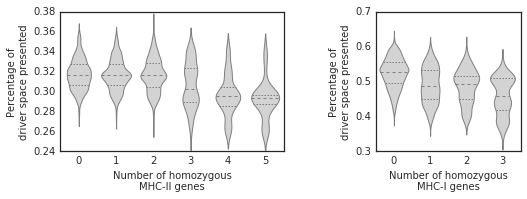

In [142]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(8.25, 2.5)) 

ax1 = plt.subplot2grid((1, 6), (0, 0), colspan=3)
sns.violinplot(x='homozygous_classII', y='classII', data=df,
               color='lightgrey', inner='quartile', order=[0, 1, 2, 3, 4, 5], ax=ax1)
plt.xlabel('Number of homozygous\nMHC-II genes')
plt.ylabel('Percentage of\ndriver space presented')


ax2 = plt.subplot2grid((1, 6), (0, 4), colspan=2)
sns.violinplot(x='homozygous_classI', y='classI', data=df, 
               color='lightgrey', inner='quartile', order=[0, 1, 2, 3], ax=ax2)
plt.xlabel('Number of homozygous\nMHC-I genes')
plt.ylabel('Percentage of\ndriver space presented')
plt.locator_params(axis='y', nbins=6)

plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/homozygosity.both.pdf')

Age for class II

In [144]:
tissue_order = [x for x in list(df.dropna().Tissue.value_counts().index) if x in tissues_to_use]
d, t_used = [], []
f, a = 0, 0
for tissue in tissue_order:
    difference = np.median(df[(df.Tissue == tissue)&(df.classII_cat == 'low')].Age.dropna()) - np.median(df[(df.Tissue == tissue)&(df.classII_cat == 'high')].Age.dropna())
    print tissue, difference, sp.mannwhitneyu(df[(df.Tissue == tissue)&(df.classII_cat == 'low')].Age,
                                              df[(df.Tissue == tissue)&(df.classII_cat == 'high')].Age)
    d.append(difference)
    t_used.append(tissue)
    if difference < -2:
        f +=1
    elif difference > 2:
        a += 1
print f, a
tissues_sorted_by_difference = list(pd.DataFrame({'Difference': d, 'Tissue': t_used}).sort_values('Difference').Tissue)

LGG 3.0 MannwhitneyuResult(statistic=4464.0, pvalue=0.41638274061048275)
HNSC -0.5 MannwhitneyuResult(statistic=5668.0, pvalue=0.45121273524426031)
LUAD 0.0 MannwhitneyuResult(statistic=5751.0, pvalue=0.47681959164160248)
SKCM 2.0 MannwhitneyuResult(statistic=3766.0, pvalue=0.27107436788366335)
BLCA -4.0 MannwhitneyuResult(statistic=2291.0, pvalue=0.076128535260019017)
THCA 4.0 MannwhitneyuResult(statistic=3767.5, pvalue=0.24223566352634152)
LIHC 1.5 MannwhitneyuResult(statistic=1777.0, pvalue=0.17039068753153774)
STAD -4.0 MannwhitneyuResult(statistic=2132.0, pvalue=0.0094794551384410914)
GBM 2.0 MannwhitneyuResult(statistic=1958.5, pvalue=0.062396646656381102)
LUSC -2.0 MannwhitneyuResult(statistic=2842.5, pvalue=0.056466335242352415)
COAD 0.5 MannwhitneyuResult(statistic=2150.5, pvalue=0.45661932885043699)
OV -2.0 MannwhitneyuResult(statistic=856.0, pvalue=0.34126510420367895)
PAAD -3.0 MannwhitneyuResult(statistic=480.5, pvalue=0.14719441854985926)
PRAD 2.0 MannwhitneyuResult(stati

In [145]:
sample_sizes = df[df.classI_cat.isin(['low', 'high'])].groupby(['Tissue', 'classII_cat']).count().classII.reset_index()

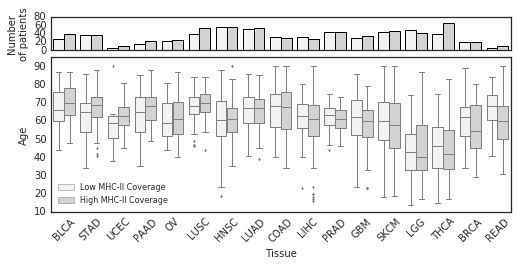

In [148]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(8.25, 3.5)) 

ax2 = plt.subplot2grid((5, 1), (0, 0), rowspan=1)
sns.barplot(x='Tissue', y='classII', hue='classII_cat', data=sample_sizes,
            order=tissues_sorted_by_difference, hue_order=['low','high'], color='lightgrey',
            ax = ax2)
plt.xticks(rotation=45)
plt.legend('')
ax2.set_xticklabels('')
plt.xlabel('')
plt.ylabel('Number\nof patients')
plt.locator_params(axis='y', nbins=4)

ax3 = plt.subplot2grid((5, 1), (1, 0), rowspan=4)
sns.boxplot(x='Tissue', y='Age', hue='classII_cat', data=df, order=tissues_sorted_by_difference,
            hue_order=['low','high'], color='lightgrey', fliersize=2, ax=ax3)
plt.xticks(rotation=45)
plt.ylim(10, 95)
L = plt.legend(loc=3, prop={'size': 8})
L.get_texts()[0].set_text('Low MHC-II Coverage')
L.get_texts()[1].set_text('High MHC-II Coverage')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/age.II.pdf')

Age for class I

In [149]:
tissue_order = [x for x in list(df.dropna().Tissue.value_counts().index) if x in tissues_to_use]
d, p, t_used = [], [], []
f, a = 0, 0
for tissue in tissue_order:
    difference = np.median(df[(df.Tissue == tissue)&(df.classI_cat == 'low')].Age.dropna()) - np.median(df[(df.Tissue == tissue)&(df.classI_cat == 'high')].Age.dropna())
    u, p_value = sp.mannwhitneyu(df[(df.Tissue == tissue)&(df.classI_cat == 'low')].Age,
                                              df[(df.Tissue == tissue)&(df.classI_cat == 'high')].Age)
    print tissue, difference, p_value
    d.append(difference)
    p.append(p_value)
    t_used.append(tissue)
    if difference < -2:
        f +=1
    elif difference > 2:
        a += 1
print f, a
tissues_sorted_by_difference = list(pd.DataFrame({'Difference': d, 'Tissue': t_used}).sort_values('Difference').Tissue)

LGG 2.0 0.26853258406
HNSC 1.0 0.373488850516
LUAD -4.5 0.193083531852
SKCM -1.0 0.244789912854
BLCA -1.5 0.271676346837
THCA -1.0 0.294642918383
LIHC -4.5 0.00393770183866
STAD 2.0 0.24730302055
GBM -1.0 0.370888631132
LUSC 3.0 0.192178827681
COAD -8.0 0.0331160823701
OV -0.5 0.482047033722
PAAD -0.5 0.5
PRAD 1.0 0.423559386918
BRCA -4.0 0.234304732537
READ -6.0 0.0855017847396
UCEC 1.5 0.25249678631
5 1


In [150]:
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import FloatVector
stats = importr('stats')

In [151]:
results_df = pd.DataFrame({'Tissue': t_used,
                           'P_value': p})
results_df['Adj-P'] = stats.p_adjust(FloatVector(results_df['P_value']), method = 'BH')

In [152]:
results_df

,P_value,Tissue,Adj-P
0,0.268533,LGG,0.417411
1,0.373489,HNSC,0.453522
2,0.193084,LUAD,0.417411
3,0.244790,SKCM,0.417411
4,0.271676,BLCA,0.417411
5,0.294643,THCA,0.417411
6,0.003938,LIHC,0.066941
7,0.247303,STAD,0.417411
8,0.370889,GBM,0.453522
9,0.192179,LUSC,0.417411


In [153]:
sample_sizes = df[df.classI_cat.isin(['low', 'high'])].groupby(['Tissue', 'classI_cat']).count().classI.reset_index()

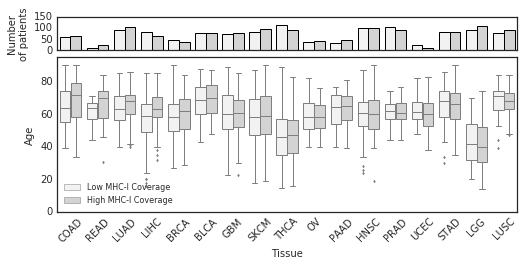

In [156]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(8.25, 3.5)) 

ax2 = plt.subplot2grid((5, 1), (0, 0), rowspan=1)
sns.barplot(x='Tissue', y='classI', hue='classI_cat', data=sample_sizes,
            order=tissues_sorted_by_difference, hue_order=['low','high'], color='lightgrey',
            ax = ax2)
plt.xticks(rotation=45)
plt.legend('')
ax2.set_xticklabels('')
plt.xlabel('')
plt.ylabel('Number\nof patients')
plt.locator_params(axis='y', nbins=4)

ax3 = plt.subplot2grid((5, 1), (1, 0), rowspan=4)
sns.boxplot(x='Tissue', y='Age', hue='classI_cat', data=df, order=tissues_sorted_by_difference,
            hue_order=['low','high'], color='lightgrey', fliersize=2, ax=ax3)
plt.xticks(rotation=45)
plt.ylim(0, 95)
L = plt.legend(loc=3, prop={'size': 8})
L.get_texts()[0].set_text('Low MHC-I Coverage')
L.get_texts()[1].set_text('High MHC-I Coverage')
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/age.I.pdf')

In [157]:
effects = []
for tissue in tissues_sorted_by_difference:
    difference_median = np.median(df[(df.Tissue == tissue)&(df.classI_cat == 'low')].Age.dropna()) - np.median(df[(df.Tissue == tissue)&(df.classI_cat == 'high')].Age.dropna())
    difference_mean = np.mean(df[(df.Tissue == tissue)&(df.classI_cat == 'low')].Age.dropna()) - np.mean(df[(df.Tissue == tissue)&(df.classI_cat == 'high')].Age.dropna())
    print tissue, difference_median, difference_mean
    effects.append(difference_mean)

COAD -8.0 -3.71025641026
READ -6.0 -2.95833333333
LUAD -4.5 -2.38554491564
LIHC -4.5 -6.40740740741
BRCA -4.0 -1.34097108565
BLCA -1.5 -1.48036351834
GBM -1.0 0.726154394723
SKCM -1.0 -1.74595154813
THCA -1.0 -1.13870719508
OV -0.5 0.142105263158
PAAD -0.5 -0.298913043478
HNSC 1.0 0.0197959183674
PRAD 1.0 0.0908599827139
UCEC 1.5 3.32167832168
STAD 2.0 0.928174235403
LGG 2.0 1.12783546729
LUSC 3.0 0.873333333333


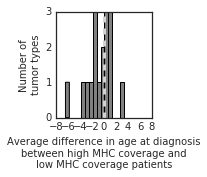

In [162]:
plt.figure(figsize=(2.5, 2.5))
ax = pd.Series(effects).hist(bins=15, color='grey')
plt.axvline(0, c='lightgrey', linewidth=3, linestyle='--')
ax.grid(False)
plt.xlim(-8, 8)
#plt.ylim(0, 3.5)
plt.xlabel('Average difference in age at diagnosis\nbetween high MHC coverage and\nlow MHC coverage patients')
plt.ylabel('Number of\ntumor types')
plt.locator_params(axis='y', nbins=3)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/age_effect_size.pdf')

In [122]:
# dbGap populations

In [93]:
patients_used = list(pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.alternate.csv',
                          index_col=0).index)

In [99]:
#df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/hla_types/hla_types.alternate.csv', index_col=0)
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/hla_types/hla_types.alternate.all.csv', index_col=0)
len(df)

833

In [95]:
#df = df.ix[patients_used]

In [96]:
all_populations = ['2017_dbGap_phs000209.v13.p3_MESA', '2017_dbGap_phs000254.v2.p1_NHLBILungCF', 
                   '2017_dbGap_phs000290.v1.p1_NHLBILungPAH', '2017_dbGap_phs000632.v1.p1_NHLBIFamHC',
                   '2017_dbGap_phs000362.v1.p1_NHLBIFamFAF', '2017_dbGap_phs000422.v1.p1_NHLBILungA',
                   '2017_dbGap_phs000518.v1.p1_NHLBIFamIB', '2017_dbGap_phs000631.v1.p1_ARDSnet',
                   '2017_dbGap_phs000179.v5.p2_GenEpidCOPD', '2017_dbGap_phs000291.v2.p1_NHLBILungCOPD']
all_samples_raw = [['SRR646695.sra SRR646696.sra SRR646697.sra SRR646698.sra SRR646699.sra SRR646700.sra SRR646701.sra SRR646702.sra SRR646703.sra SRR646704.sra SRR646705.sra SRR646706.sra SRR646707.sra SRR646708.sra SRR646709.sra SRR646710.sra SRR646711.sra SRR646712.sra SRR646713.sra SRR646714.sra SRR646715.sra SRR646716.sra SRR646717.sra SRR646718.sra SRR646719.sra SRR646720.sra SRR646721.sra SRR646722.sra SRR646723.sra SRR646724.sra SRR646725.sra SRR646726.sra SRR646727.sra SRR646728.sra SRR646729.sra SRR646730.sra SRR646731.sra SRR646732.sra SRR646733.sra SRR646734.sra SRR646735.sra SRR646736.sra SRR646737.sra SRR646738.sra SRR646739.sra SRR646740.sra SRR646741.sra SRR646742.sra SRR646743.sra SRR646744.sra SRR646745.sra SRR646746.sra SRR646747.sra SRR646749.sra SRR646750.sra SRR646751.sra SRR646752.sra SRR646753.sra SRR646754.sra SRR646755.sra SRR646756.sra SRR646757.sra SRR646758.sra SRR646759.sra SRR646760.sra SRR646761.sra SRR646762.sra SRR646763.sra SRR646765.sra SRR646766.sra SRR646767.sra SRR646769.sra SRR646770.sra SRR646771.sra SRR646772.sra SRR646773.sra SRR646774.sra SRR646775.sra SRR646777.sra SRR646778.sra SRR646779.sra SRR646780.sra SRR646781.sra SRR646782.sra SRR646783.sra SRR646784.sra SRR646785.sra SRR646786.sra SRR646787.sra SRR646789.sra SRR646791.sra SRR646793.sra SRR646795.sra SRR646797.sra SRR646798.sra SRR646800.sra SRR646801.sra SRR646802.sra SRR646803.sra SRR646804.sra SRR646805.sra SRR646806.sra SRR646807.sra SRR646808.sra SRR646809.sra SRR646810.sra SRR646811.sra SRR646812.sra SRR646813.sra SRR646814.sra SRR646815.sra SRR646816.sra SRR646817.sra SRR646818.sra SRR646819.sra SRR646820.sra SRR646821.sra SRR646822.sra SRR646824.sra SRR646825.sra SRR646826.sra SRR646827.sra SRR646828.sra SRR646831.sra SRR646832.sra SRR646833.sra SRR646834.sra SRR646836.sra SRR646837.sra SRR646838.sra SRR646839.sra SRR646840.sra SRR646841.sra SRR646842.sra SRR646843.sra SRR646844.sra SRR646845.sra SRR646846.sra SRR646847.sra SRR646848.sra SRR646849.sra SRR646850.sra SRR646851.sra SRR646852.sra SRR646853.sra SRR646854.sra SRR646855.sra SRR646856.sra SRR646857.sra SRR646859.sra SRR646860.sra SRR646861.sra SRR646862.sra SRR646863.sra SRR646864.sra SRR646865.sra SRR646867.sra SRR646871.sra SRR646872.sra SRR646873.sra SRR646874.sra SRR646875.sra SRR646876.sra SRR646877.sra SRR646880.sra SRR646881.sra SRR646882.sra SRR646883.sra SRR646884.sra SRR646886.sra SRR646887.sra SRR646888.sra SRR646890.sra SRR646892.sra SRR646893.sra SRR646895.sra SRR646896.sra SRR646898.sra SRR646899.sra SRR646900.sra SRR646901.sra SRR646902.sra SRR646903.sra SRR646904.sra SRR646905.sra SRR646906.sra SRR646907.sra SRR646908.sra SRR646909.sra SRR646910.sra SRR646911.sra SRR646912.sra SRR646913.sra SRR646914.sra SRR646915.sra SRR646916.sra SRR646917.sra SRR646918.sra SRR646919.sra SRR646920.sra SRR646921.sra SRR646922.sra SRR646923.sra SRR646924.sra SRR646925.sra SRR646926.sra SRR646927.sra SRR646928.sra SRR646929.sra SRR646931.sra SRR646932.sra SRR646934.sra SRR646935.sra SRR646936.sra SRR646937.sra SRR646938.sra SRR646939.sra SRR646940.sra SRR646941.sra SRR646942.sra SRR646943.sra SRR646945.sra SRR646947.sra SRR646948.sra SRR646949.sra SRR646950.sra SRR646952.sra SRR646953.sra SRR646955.sra SRR646956.sra SRR646957.sra SRR646958.sra SRR646959.sra SRR646960.sra SRR646962.sra SRR646963.sra SRR646965.sra SRR646966.sra SRR646967.sra SRR646968.sra SRR646970.sra SRR646972.sra SRR646973.sra SRR646974.sra SRR646975.sra SRR646976.sra SRR646977.sra SRR646978.sra SRR646981.sra SRR646982.sra SRR646983.sra SRR646984.sra SRR646985.sra SRR646986.sra SRR646987.sra SRR646988.sra SRR646989.sra SRR646990.sra SRR646991.sra SRR646992.sra SRR646993.sra SRR646994.sra SRR646995.sra SRR646996.sra SRR646997.sra SRR646998.sra SRR646999.sra SRR647000.sra SRR647001.sra SRR647002.sra SRR647003.sra SRR647004.sra SRR647005.sra SRR647006.sra SRR647007.sra SRR647008.sra SRR647009.sra SRR647010.sra SRR647011.sra SRR647012.sra SRR647013.sra SRR647015.sra SRR647016.sra SRR647017.sra SRR647018.sra SRR647019.sra SRR647020.sra SRR647021.sra SRR647022.sra SRR647024.sra SRR647025.sra SRR647026.sra SRR647027.sra SRR776613.sra SRR776613.sra.vdbcache SRR776679.sra SRR776679.sra.vdbcache SRR776736.sra SRR776736.sra.vdbcache SRR776793.sra SRR776793.sra.vdbcache SRR776859.sra SRR776859.sra.vdbcache SRR776916.sra SRR776916.sra.vdbcache SRR777030.sra SRR777030.sra.vdbcache SRR777096.sra SRR777096.sra.vdbcache SRR777153.sra SRR777153.sra.vdbcache SRR777219.sra SRR777219.sra.vdbcache SRR777285.sra SRR777285.sra.vdbcache SRR777342.sra SRR777342.sra.vdbcache SRR777408.sra SRR777408.sra.vdbcache SRR777474.sra SRR777474.sra.vdbcache SRR777540.sra SRR777540.sra.vdbcache SRR777606.sra SRR777606.sra.vdbcache SRR777664.sra SRR777664.sra.vdbcache SRR777789.sra SRR777789.sra.vdbcache SRR777855.sra SRR777855.sra.vdbcache SRR777969.sra SRR778026.sra SRR778026.sra.vdbcache SRR778092.sra SRR778092.sra.vdbcache SRR778149.sra SRR778149.sra.vdbcache SRR778281.sra SRR778281.sra.vdbcache SRR778413.sra SRR778413.sra.vdbcache SRR778479.sra SRR778479.sra.vdbcache SRR778545.sra SRR778545.sra.vdbcache SRR778611.sra SRR778611.sra.vdbcache SRR778668.sra SRR778668.sra.vdbcache SRR778725.sra SRR778725.sra.vdbcache SRR778791.sra SRR778791.sra.vdbcache SRR778848.sra SRR778848.sra.vdbcache SRR778905.sra SRR778905.sra.vdbcache SRR779019.sra SRR779019.sra.vdbcache SRR779076.sra SRR779076.sra.vdbcache SRR779208.sra SRR779208.sra.vdbcache SRR779331.sra SRR779331.sra.vdbcache SRR779388.sra SRR779388.sra.vdbcache SRR779454.sra SRR779454.sra.vdbcache SRR779511.sra SRR779511.sra.vdbcache SRR779643.sra SRR779643.sra.vdbcache SRR779700.sra SRR779700.sra.vdbcache SRR779757.sra SRR779757.sra.vdbcache SRR779823.sra SRR779823.sra.vdbcache SRR779880.sra SRR779880.sra.vdbcache SRR779937.sra SRR779937.sra.vdbcache SRR780060.sra SRR780060.sra.vdbcache SRR780126.sra SRR780126.sra.vdbcache SRR780183.sra SRR780183.sra.vdbcache SRR780249.sra SRR780249.sra.vdbcache SRR780381.sra SRR780381.sra.vdbcache SRR780438.sra SRR780438.sra.vdbcache SRR780570.sra SRR780570.sra.vdbcache SRR780627.sra SRR780627.sra.vdbcache SRR780693.sra SRR780693.sra.vdbcache SRR780750.sra SRR780750.sra.vdbcache SRR780807.sra SRR780807.sra.vdbcache SRR780934.sra SRR780934.sra.vdbcache SRR780991.sra SRR780991.sra.vdbcache SRR781048.sra SRR781048.sra.vdbcache SRR781105.sra SRR781105.sra.vdbcache SRR781162.sra SRR781162.sra.vdbcache SRR781228.sra SRR781228.sra.vdbcache SRR781285.sra SRR781285.sra.vdbcache SRR781342.sra SRR781342.sra.vdbcache SRR781399.sra SRR781399.sra.vdbcache SRR781458.sra SRR781458.sra.vdbcache SRR781525.sra SRR781525.sra.vdbcache SRR781640.sra SRR781640.sra.vdbcache SRR781707.sra SRR781707.sra.vdbcache SRR781773.sra SRR781773.sra.vdbcache SRR781889.sra SRR781889.sra.vdbcache SRR782022.sra SRR782022.sra.vdbcache SRR784764.sra SRR784764.sra.vdbcache'],
                   ['SRR201049.sra SRR201052.sra SRR201055.sra SRR201058.sra SRR201061.sra SRR201063.sra SRR201067.sra SRR201071.sra SRR201073.sra SRR201078.sra SRR201098.sra SRR201100.sra SRR201102.sra SRR201104.sra SRR201106.sra SRR605759.sra SRR605760.sra SRR605761.sra SRR605762.sra SRR605764.sra SRR605765.sra SRR605767.sra SRR605770.sra SRR605772.sra SRR605773.sra SRR605775.sra SRR605778.sra SRR605780.sra SRR605782.sra SRR605784.sra SRR605786.sra SRR605788.sra SRR605790.sra SRR605791.sra SRR605792.sra SRR605793.sra SRR605794.sra SRR605795.sra SRR605796.sra SRR605797.sra SRR605798.sra SRR605799.sra SRR605800.sra SRR605801.sra SRR605802.sra SRR605803.sra SRR605804.sra SRR605805.sra SRR605806.sra SRR605807.sra SRR605808.sra SRR605809.sra SRR605811.sra SRR605812.sra SRR605813.sra SRR605814.sra SRR605816.sra SRR605817.sra SRR605818.sra SRR605819.sra SRR605820.sra SRR605821.sra SRR605822.sra SRR605823.sra SRR605824.sra SRR605825.sra SRR605826.sra SRR605827.sra SRR605828.sra SRR605829.sra SRR605830.sra SRR605831.sra SRR605832.sra SRR605833.sra SRR605834.sra SRR605835.sra SRR605836.sra SRR605837.sra SRR605838.sra SRR605839.sra SRR605841.sra SRR605842.sra SRR605843.sra SRR605844.sra SRR605845.sra SRR605846.sra SRR605847.sra SRR605848.sra SRR605849.sra SRR605850.sra SRR605851.sra SRR605852.sra SRR605853.sra SRR605854.sra SRR605855.sra SRR605856.sra SRR605857.sra SRR605858.sra SRR605859.sra SRR605860.sra SRR605861.sra SRR605862.sra SRR605863.sra SRR605865.sra SRR605866.sra SRR605867.sra SRR605869.sra SRR605870.sra SRR605871.sra SRR605872.sra SRR605873.sra SRR605874.sra SRR605875.sra SRR605876.sra SRR605877.sra SRR605878.sra SRR605879.sra SRR605881.sra SRR605882.sra SRR605883.sra SRR605884.sra SRR605885.sra SRR605887.sra SRR605888.sra SRR605889.sra SRR605890.sra SRR605891.sra SRR605892.sra SRR605893.sra SRR605894.sra SRR605895.sra SRR605896.sra SRR605897.sra SRR605898.sra SRR605899.sra SRR605900.sra SRR605901.sra SRR605902.sra SRR605903.sra SRR605904.sra SRR605905.sra SRR605906.sra SRR605907.sra SRR605908.sra SRR605909.sra SRR605910.sra SRR605911.sra SRR605913.sra SRR605918.sra SRR605919.sra SRR605920.sra SRR605924.sra SRR605925.sra SRR605926.sra SRR605930.sra SRR605933.sra SRR605934.sra SRR605935.sra SRR605938.sra SRR605966.sra SRR605967.sra SRR605969.sra SRR605971.sra SRR605972.sra SRR605974.sra SRR605976.sra SRR605978.sra SRR605980.sra SRR605982.sra SRR605983.sra SRR605984.sra SRR605987.sra SRR605991.sra SRR605999.sra SRR606000.sra SRR606001.sra SRR606002.sra SRR606003.sra SRR606004.sra SRR606005.sra SRR606006.sra SRR606007.sra SRR606008.sra SRR606010.sra SRR606011.sra SRR606014.sra SRR606016.sra SRR606020.sra SRR606023.sra SRR606025.sra SRR606027.sra SRR606029.sra SRR606030.sra SRR606046.sra SRR606048.sra SRR606049.sra SRR606050.sra SRR606051.sra SRR606052.sra SRR606053.sra SRR606054.sra SRR606055.sra SRR606056.sra SRR606061.sra SRR606062.sra SRR606063.sra SRR606064.sra SRR606067.sra SRR606068.sra SRR606069.sra SRR606070.sra SRR606081.sra SRR606082.sra SRR606083.sra SRR606084.sra SRR606086.sra SRR606088.sra SRR606090.sra SRR606092.sra SRR606093.sra SRR606095.sra SRR606096.sra SRR606098.sra SRR606101.sra SRR606119.sra SRR606120.sra SRR606121.sra SRR606122.sra SRR606123.sra SRR606124.sra'],
                   ['SRR341285.sra SRR341287.sra SRR341289.sra SRR341291.sra SRR341292.sra SRR341294.sra SRR341297.sra SRR341298.sra SRR341299.sra SRR341301.sra SRR341303.sra SRR341305.sra SRR341307.sra SRR341309.sra SRR341311.sra SRR341312.sra SRR341313.sra SRR341315.sra SRR341316.sra SRR341318.sra SRR341319.sra SRR341320.sra SRR341321.sra SRR341322.sra SRR341324.sra SRR341325.sra SRR341326.sra SRR341328.sra SRR341330.sra SRR341332.sra SRR341334.sra SRR341336.sra SRR341338.sra SRR341340.sra SRR341342.sra SRR341344.sra SRR341346.sra SRR341348.sra SRR341350.sra SRR341352.sra SRR341353.sra SRR341355.sra SRR341357.sra SRR341359.sra SRR341361.sra SRR341363.sra SRR341365.sra SRR341367.sra SRR341369.sra SRR341371.sra SRR341373.sra SRR341375.sra SRR341377.sra SRR341379.sra SRR341381.sra SRR341383.sra SRR341385.sra SRR341387.sra SRR341389.sra SRR341391.sra SRR341393.sra SRR341395.sra SRR341397.sra SRR341399.sra SRR341401.sra SRR341403.sra SRR341405.sra SRR341407.sra SRR341409.sra SRR341411.sra SRR341413.sra SRR341415.sra SRR341417.sra SRR341419.sra SRR341421.sra SRR341423.sra SRR341425.sra SRR341427.sra SRR341731.sra SRR341733.sra SRR341756.sra SRR341777.sra SRR341783.sra SRR341785.sra SRR341787.sra SRR341800.sra SRR341810.sra SRR341848.sra SRR341852.sra SRR341863.sra SRR341873.sra SRR341877.sra SRR341879.sra SRR341885.sra'],
                   ['SRR1034682.sra SRR1034682.sra.vdbcache SRR1034704.sra SRR1034704.sra.vdbcache SRR1034717.sra SRR1034717.sra.vdbcache SRR1034730.sra SRR1034730.sra.vdbcache SRR1034743.sra SRR1034743.sra.vdbcache SRR1034765.sra SRR1034765.sra.vdbcache SRR1034870.sra SRR1034870.sra.vdbcache SRR1034883.sra SRR1034883.sra.vdbcache SRR1034905.sra SRR1034905.sra.vdbcache SRR1034927.sra SRR1034927.sra.vdbcache SRR1034940.sra SRR1034940.sra.vdbcache SRR1034962.sra SRR1034962.sra.vdbcache SRR1034984.sra SRR1034984.sra.vdbcache SRR1035006.sra SRR1035006.sra.vdbcache SRR1035019.sra SRR1035019.sra.vdbcache SRR1035032.sra SRR1035032.sra.vdbcache SRR1035045.sra SRR1035045.sra.vdbcache SRR1035067.sra SRR1035067.sra.vdbcache SRR1035090.sra SRR1035090.sra.vdbcache'],
                   ['SRR886309 SRR886309.sra SRR886309.sra.vdbcache SRR886315 SRR886315.sra SRR886315.sra.vdbcache SRR886332 SRR886332.sra SRR886332.sra.vdbcache SRR886338 SRR886338.sra SRR886338.sra.vdbcache SRR886344 SRR886344.sra SRR886344.sra.vdbcache SRR886352 SRR886352.sra SRR886352.sra.vdbcache SRR886358 SRR886358.sra SRR886358.sra.vdbcache SRR886364 SRR886364.sra SRR886364.sra.vdbcache SRR886390 SRR886390.sra SRR886390.sra.vdbcache SRR886396 SRR886396.sra SRR886396.sra.vdbcache SRR886422 SRR886422.sra SRR886422.sra.vdbcache SRR886440 SRR886440.sra SRR886440.sra.vdbcache'],
                   ['SRR837145.sra SRR837147.sra SRR837149.sra SRR837151.sra SRR837153.sra SRR837155.sra SRR837157.sra SRR837160.sra SRR837161.sra SRR837162.sra SRR837163.sra SRR837164.sra SRR837165.sra SRR837166.sra SRR837167.sra SRR837168.sra SRR837169.sra SRR837171.sra SRR837173.sra SRR837175.sra SRR837177.sra SRR837179.sra SRR837181.sra SRR837183.sra SRR837185.sra SRR837186.sra SRR837187.sra SRR837188.sra SRR837189.sra SRR837191.sra SRR837192.sra SRR837193.sra SRR837194.sra SRR837196.sra SRR837198.sra SRR837199.sra SRR837200.sra SRR837201.sra SRR837202.sra SRR837203.sra SRR837204.sra SRR837205.sra SRR837207.sra SRR837208.sra SRR837209.sra SRR837211.sra SRR837212.sra SRR837213.sra SRR837215.sra SRR837216.sra SRR837218.sra SRR837219.sra SRR837220.sra SRR837221.sra SRR837222.sra SRR837223.sra SRR837224.sra SRR837225.sra SRR837226.sra SRR837227.sra SRR837228.sra SRR837229.sra SRR837230.sra SRR837231.sra SRR837233.sra SRR837234.sra SRR837235.sra SRR837236.sra SRR837237.sra SRR837238.sra SRR837239.sra SRR837241.sra SRR837242.sra SRR837243.sra SRR837245.sra SRR837246.sra SRR837247.sra SRR837248.sra SRR837249.sra SRR837250.sra SRR837251.sra SRR837252.sra SRR837253.sra SRR837254.sra SRR837256.sra SRR837257.sra SRR837259.sra SRR837260.sra SRR837261.sra SRR837262.sra SRR837263.sra SRR837264.sra SRR837265.sra SRR837266.sra SRR837267.sra SRR837268.sra SRR837269.sra SRR837271.sra SRR837273.sra SRR837274.sra SRR837276.sra SRR837278.sra SRR837280.sra SRR837281.sra SRR837282.sra SRR837283.sra SRR837284.sra SRR837285.sra SRR837286.sra SRR837287.sra SRR837288.sra SRR837289.sra SRR837290.sra SRR837291.sra SRR837293.sra SRR837294.sra SRR837295.sra SRR837296.sra SRR837297.sra SRR837298.sra SRR837299.sra SRR837300.sra SRR837301.sra SRR837302.sra SRR837303.sra SRR837304.sra SRR837305.sra SRR837306.sra SRR837307.sra SRR837308.sra SRR837309.sra SRR837310.sra SRR837311.sra SRR837312.sra SRR837313.sra SRR837314.sra SRR837315.sra SRR837316.sra SRR837317.sra SRR837318.sra SRR837319.sra SRR837320.sra SRR837321.sra SRR837322.sra SRR837323.sra SRR837324.sra SRR837325.sra SRR837326.sra SRR837327.sra SRR837329.sra SRR837330.sra SRR837332.sra SRR837334.sra SRR837335.sra SRR837337.sra SRR837339.sra SRR837340.sra SRR837341.sra SRR837342.sra SRR837343.sra SRR837344.sra SRR837345.sra SRR837346.sra SRR837347.sra SRR837348.sra SRR837349.sra SRR837351.sra SRR837353.sra SRR837354.sra SRR837355.sra SRR837356.sra SRR837357.sra SRR837358.sra SRR837359.sra SRR837360.sra SRR837361.sra SRR837362.sra SRR837363.sra SRR837364.sra SRR837365.sra SRR837366.sra SRR837367.sra SRR837368.sra SRR837369.sra SRR837370.sra SRR837371.sra SRR837372.sra SRR837373.sra SRR837374.sra SRR837375.sra SRR837376.sra'],
                   ['SRR567592.sra SRR567593.sra SRR567595.sra SRR567596.sra SRR567597.sra SRR567598.sra SRR567599.sra SRR567600.sra SRR567601.sra SRR567602.sra SRR567603.sra SRR567604.sra SRR567605.sra SRR567606.sra SRR567607.sra SRR567608.sra SRR567609.sra SRR567610.sra SRR567611.sra SRR567612.sra SRR567613.sra SRR567614.sra SRR567615.sra SRR567616.sra'],
                   ['SRR484310.sra SRR484311.sra SRR484312.sra SRR484313.sra SRR484314.sra SRR484315.sra SRR484316.sra SRR484317.sra SRR484318.sra SRR484319.sra SRR484320.sra SRR484321.sra SRR484322.sra SRR484323.sra SRR484324.sra SRR484325.sra SRR484326.sra SRR484327.sra SRR484328.sra SRR484329.sra SRR484330.sra SRR484331.sra SRR484332.sra SRR484333.sra SRR484334.sra SRR484335.sra SRR484336.sra SRR484337.sra SRR484338.sra SRR484339.sra SRR484340.sra SRR484341.sra SRR484342.sra SRR484343.sra SRR484344.sra SRR484345.sra SRR484346.sra SRR484347.sra SRR484348.sra SRR484349.sra SRR484350.sra SRR484351.sra SRR484352.sra SRR484353.sra SRR484354.sra SRR484355.sra SRR484356.sra SRR484358.sra SRR484359.sra SRR484360.sra SRR484361.sra SRR484362.sra SRR484363.sra SRR484364.sra SRR484365.sra SRR484366.sra SRR484367.sra SRR484368.sra SRR484369.sra SRR484370.sra SRR484371.sra SRR484372.sra SRR484373.sra SRR484374.sra SRR484375.sra SRR484376.sra SRR484377.sra SRR484378.sra SRR484379.sra SRR484380.sra SRR484381.sra SRR484382.sra SRR484383.sra SRR484384.sra SRR484385.sra SRR484386.sra SRR484387.sra SRR484388.sra SRR484389.sra SRR484390.sra SRR484391.sra SRR484392.sra SRR484393.sra SRR484394.sra SRR484395.sra SRR484396.sra SRR484398.sra SRR484399.sra SRR484400.sra'],
                   ['SRR520540.sra SRR520541.sra SRR520542.sra SRR520543.sra SRR520544.sra SRR520546.sra SRR520547.sra SRR520548.sra SRR520549.sra SRR520550.sra SRR520551.sra SRR520552.sra SRR520553.sra SRR520554.sra SRR520555.sra SRR520556.sra SRR520557.sra SRR520558.sra SRR520559.sra SRR520560.sra SRR520561.sra SRR520562.sra SRR520563.sra SRR520564.sra SRR520565.sra SRR520567.sra SRR520568.sra SRR520569.sra SRR520570.sra SRR520571.sra SRR520590.sra SRR520591.sra SRR520592.sra SRR520593.sra SRR520594.sra SRR520595.sra SRR520596.sra SRR520597.sra SRR520598.sra SRR520599.sra SRR520600.sra SRR520601.sra SRR520602.sra SRR520603.sra SRR520604.sra SRR520605.sra SRR520606.sra SRR520607.sra SRR520608.sra SRR520609.sra SRR520610.sra SRR520611.sra SRR520612.sra SRR520613.sra SRR520614.sra SRR520615.sra SRR520616.sra SRR520617.sra SRR520618.sra SRR520619.sra SRR520620.sra SRR520621.sra SRR520622.sra SRR520623.sra SRR520624.sra SRR520625.sra SRR520626.sra SRR520627.sra SRR520628.sra SRR520629.sra SRR520630.sra SRR520631.sra SRR520632.sra SRR520633.sra SRR520634.sra SRR520635.sra SRR520636.sra SRR520637.sra SRR520638.sra SRR520639.sra SRR520640.sra SRR520641.sra SRR520642.sra SRR520643.sra SRR520644.sra SRR520645.sra SRR520646.sra SRR520647.sra SRR520649.sra SRR520650.sra SRR520651.sra SRR520652.sra SRR520654.sra SRR520656.sra SRR520658.sra SRR520659.sra SRR520660.sra SRR520662.sra SRR520663.sra SRR520665.sra SRR520666.sra SRR520668.sra SRR520669.sra SRR520670.sra SRR520671.sra SRR520672.sra SRR520673.sra SRR520674.sra SRR520675.sra SRR520676.sra SRR520677.sra SRR520678.sra SRR520679.sra SRR520680.sra SRR520681.sra SRR520682.sra SRR520683.sra SRR520684.sra SRR520685.sra SRR520686.sra SRR520687.sra SRR520688.sra SRR520689.sra SRR520690.sra SRR520691.sra SRR520692.sra SRR520693.sra SRR520694.sra SRR520695.sra SRR520696.sra SRR520697.sra SRR520699.sra SRR520700.sra SRR520701.sra SRR520702.sra SRR520703.sra SRR520704.sra SRR520705.sra SRR520706.sra SRR520707.sra SRR520708.sra SRR520709.sra SRR520710.sra SRR520711.sra SRR520712.sra SRR520713.sra SRR520714.sra SRR520715.sra SRR520716.sra SRR520717.sra SRR520718.sra SRR520719.sra SRR520720.sra SRR520721.sra SRR520722.sra SRR520723.sra SRR520724.sra SRR520725.sra SRR520726.sra SRR520727.sra SRR520729.sra SRR520730.sra SRR520731.sra SRR520732.sra SRR520733.sra SRR520734.sra SRR520735.sra SRR520736.sra SRR520737.sra SRR520738.sra SRR520739.sra SRR520740.sra SRR520741.sra SRR520742.sra SRR520743.sra SRR520744.sra SRR520745.sra SRR520746.sra SRR520747.sra SRR520748.sra SRR520749.sra SRR520750.sra SRR520751.sra SRR520752.sra SRR520753.sra SRR520754.sra SRR520755.sra SRR520756.sra SRR520757.sra SRR520758.sra SRR520759.sra SRR520760.sra SRR520761.sra SRR520762.sra SRR520763.sra SRR520764.sra SRR520765.sra SRR520766.sra SRR520767.sra SRR520768.sra SRR520769.sra SRR520770.sra SRR520772.sra SRR520774.sra SRR520776.sra SRR520777.sra SRR520778.sra SRR520779.sra SRR520780.sra SRR520781.sra SRR520782.sra SRR520783.sra SRR520784.sra SRR520785.sra SRR520786.sra SRR520787.sra SRR520788.sra SRR520789.sra SRR520790.sra SRR520791.sra SRR520792.sra SRR520793.sra SRR520794.sra SRR520795.sra SRR520796.sra SRR520797.sra SRR520799.sra SRR520800.sra SRR520802.sra SRR520803.sra SRR520805.sra SRR520806.sra SRR520808.sra SRR520809.sra SRR520811.sra SRR520812.sra SRR520814.sra SRR520815.sra SRR520817.sra SRR520818.sra SRR520820.sra SRR520822.sra SRR520824.sra SRR520825.sra SRR520826.sra SRR520827.sra SRR520828.sra SRR520829.sra SRR520830.sra SRR520831.sra SRR520832.sra SRR520833.sra SRR520834.sra SRR520835.sra SRR520836.sra SRR520837.sra SRR520838.sra SRR520839.sra SRR520840.sra SRR520841.sra SRR520842.sra SRR520843.sra SRR520844.sra SRR520845.sra SRR520846.sra SRR520847.sra SRR520849.sra SRR520850.sra SRR520852.sra SRR520853.sra SRR520855.sra SRR520856.sra SRR520857.sra SRR520858.sra SRR520859.sra SRR520860.sra SRR520861.sra SRR520862.sra SRR520863.sra SRR520864.sra SRR520865.sra SRR520866.sra SRR520867.sra SRR520868.sra SRR520869.sra SRR520870.sra SRR520871.sra SRR520872.sra SRR520873.sra SRR628862.sra SRR628875.sra'],
                   ['SRR341726.sra SRR341728.sra SRR341731.sra SRR341733.sra SRR341735.sra SRR341737.sra SRR341739.sra SRR341741.sra SRR341744.sra SRR341746.sra SRR341748.sra SRR341750.sra SRR341752.sra SRR341754.sra SRR341756.sra SRR341758.sra SRR341760.sra SRR341762.sra SRR341764.sra SRR341767.sra SRR341769.sra SRR341771.sra SRR341773.sra SRR341775.sra SRR341777.sra SRR341779.sra SRR341781.sra SRR341783.sra SRR341785.sra SRR341787.sra SRR341788.sra SRR341790.sra SRR341792.sra SRR341794.sra SRR341796.sra SRR341798.sra SRR341800.sra SRR341802.sra SRR341804.sra SRR341806.sra SRR341808.sra SRR341810.sra SRR341812.sra SRR341814.sra SRR341816.sra SRR341818.sra SRR341820.sra SRR341822.sra SRR341824.sra SRR341826.sra SRR341828.sra SRR341830.sra SRR341832.sra SRR341834.sra SRR341836.sra SRR341840.sra SRR341842.sra SRR341844.sra SRR341846.sra SRR341848.sra SRR341850.sra SRR341852.sra SRR341854.sra SRR341857.sra SRR341859.sra SRR341861.sra SRR341863.sra SRR341865.sra SRR341867.sra SRR341869.sra SRR341871.sra SRR341873.sra SRR341875.sra SRR341877.sra SRR341879.sra SRR341881.sra SRR341883.sra SRR341885.sra SRR341887.sra SRR341889.sra SRR341891.sra SRR341893.sra SRR341895.sra SRR341897.sra SRR341899.sra SRR341901.sra SRR341903.sra SRR341905.sra SRR341907.sra SRR483653.sra SRR483655.sra SRR483656.sra SRR483657.sra SRR483658.sra SRR483659.sra SRR483660.sra SRR483661.sra SRR483662.sra SRR483663.sra SRR483664.sra SRR483665.sra SRR483668.sra SRR483669.sra SRR483670.sra SRR483671.sra SRR483672.sra SRR483673.sra SRR483674.sra SRR483675.sra SRR483676.sra SRR483677.sra SRR483678.sra SRR483679.sra SRR483680.sra SRR483681.sra SRR483682.sra SRR483683.sra SRR483684.sra SRR483686.sra SRR483687.sra SRR483688.sra SRR483689.sra SRR483690.sra SRR483691.sra SRR483692.sra SRR483693.sra SRR483694.sra SRR483695.sra SRR483696.sra SRR483697.sra SRR483698.sra SRR483699.sra SRR483700.sra SRR483702.sra SRR483703.sra SRR483704.sra SRR483705.sra SRR483706.sra SRR483707.sra SRR483708.sra SRR483709.sra SRR483710.sra SRR483711.sra SRR483712.sra SRR483713.sra SRR483714.sra SRR483715.sra SRR483716.sra SRR483717.sra SRR483718.sra SRR483719.sra SRR483720.sra SRR483721.sra SRR483722.sra SRR483723.sra SRR483724.sra SRR483725.sra SRR483726.sra SRR483727.sra SRR483728.sra SRR483729.sra SRR483730.sra SRR483731.sra SRR483732.sra SRR483733.sra SRR483734.sra SRR483735.sra SRR483736.sra SRR483738.sra SRR483739.sra SRR483741.sra SRR483743.sra SRR483745.sra SRR483747.sra SRR483750.sra SRR483752.sra SRR486396.sra SRR486397.sra SRR486398.sra SRR486399.sra SRR486400.sra SRR486401.sra SRR486402.sra SRR486403.sra SRR486404.sra SRR486405.sra SRR486406.sra SRR486407.sra SRR486408.sra SRR486409.sra SRR486410.sra SRR486411.sra SRR486412.sra SRR486413.sra SRR486414.sra SRR486415.sra SRR486416.sra SRR486417.sra SRR486418.sra SRR486419.sra SRR486420.sra SRR486421.sra SRR486422.sra SRR486423.sra SRR486424.sra SRR486425.sra SRR486426.sra SRR486427.sra SRR486428.sra SRR486429.sra SRR486430.sra SRR486431.sra SRR486432.sra SRR486433.sra SRR486434.sra SRR486435.sra SRR486436.sra SRR486437.sra SRR486438.sra SRR486439.sra SRR486440.sra SRR486441.sra SRR486442.sra SRR486443.sra SRR486444.sra SRR486445.sra SRR486446.sra SRR486447.sra SRR486449.sra SRR486451.sra SRR486453.sra SRR486454.sra SRR486455.sra SRR486457.sra SRR486459.sra SRR486460.sra SRR486461.sra SRR486463.sra SRR486464.sra SRR486465.sra SRR486466.sra SRR486468.sra SRR486469.sra SRR486471.sra SRR486472.sra SRR486473.sra SRR486474.sra SRR486475.sra SRR486476.sra SRR486477.sra SRR486478.sra SRR486479.sra SRR486480.sra SRR486481.sra SRR486482.sra SRR486483.sra SRR486484.sra SRR486485.sra SRR486486.sra SRR486487.sra SRR486488.sra SRR486490.sra SRR486491.sra SRR486493.sra SRR486494.sra SRR486495.sra SRR486496.sra SRR486497.sra SRR486498.sra SRR486499.sra SRR486500.sra SRR486501.sra SRR486502.sra SRR486503.sra SRR486505.sra SRR486507.sra SRR486509.sra SRR486511.sra SRR486513.sra SRR486515.sra SRR486517.sra SRR486519.sra SRR486520.sra SRR486521.sra SRR486522.sra SRR486523.sra SRR486524.sra SRR486525.sra SRR486526.sra SRR486527.sra SRR486528.sra SRR486529.sra SRR486531.sra SRR486533.sra SRR486535.sra SRR486536.sra SRR486537.sra SRR486538.sra SRR486539.sra SRR486540.sra SRR486541.sra SRR486543.sra SRR486544.sra SRR486545.sra SRR486546.sra SRR486547.sra SRR486548.sra SRR486549.sra SRR486550.sra SRR486551.sra SRR486552.sra SRR486553.sra SRR486555.sra SRR486556.sra SRR486557.sra SRR486558.sra SRR486559.sra SRR486560.sra SRR486561.sra SRR486562.sra SRR486563.sra SRR486564.sra SRR486565.sra SRR486566.sra SRR486567.sra SRR486568.sra SRR486569.sra SRR486570.sra SRR486571.sra SRR486572.sra SRR486573.sra SRR486574.sra SRR486575.sra SRR486576.sra SRR486577.sra SRR486578.sra SRR486579.sra']]
population_dictionary_stripped = {}
for i, population in enumerate(all_populations):
    population_dictionary_stripped[population] = [x.split('.')[0] for x in all_samples_raw[i][0].split(' ') if 'sra' in x]
population_dictionary_stripped.keys()
#patients_with_types = list(df.replace('-', np.nan).dropna().index)
patients_with_types = list(df.index)
patients_in_dictionary = []
patient_counts = {}
for population in population_dictionary_stripped.keys():
    # possibly reduce the naming of the population
    patient_counts[population.split('_')[2]] = len([x for x in population_dictionary_stripped[population] 
                                    if x in patients_with_types])
    patients_in_dictionary.extend(population_dictionary_stripped[population])
# adding in the extra population    
patient_counts['phs000398.v1.p1'] = len([x for x in patients_with_types if x not in patients_in_dictionary])
df = pd.DataFrame.from_dict(patient_counts, orient='index').reset_index()
df.columns = ['Population', 'Number of Patients']

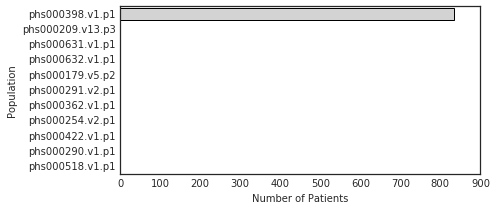

In [97]:
plt.figure(figsize=(7, 3))
sns.barplot(y='Population', x='Number of Patients', data=df, color='lightgrey')
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/non_cancer_population.pdf')

In [101]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.csv',
                index_col=0)

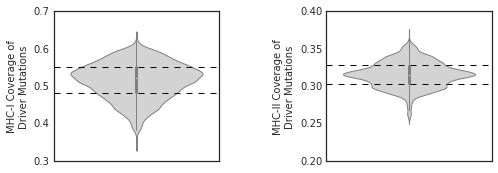

In [102]:
# Division of patients between high and low coverage
plt.figure(figsize=(7, 2.5))

ax1 = plt.subplot2grid((1, 11), (0, 0), colspan=5)
sns.violinplot(y='classI', data=df, color='lightgrey')
plt.ylabel('MHC-I Coverage of\nDriver Mutations')
plt.axhline(df[df.classI_cat == 'high'].classI.min(), c='k', linestyle='--')
plt.axhline(df[df.classI_cat == 'low'].classI.max(), c='k', linestyle='--')
plt.locator_params(nbins=6)
plt.tight_layout()

ax2 = plt.subplot2grid((1, 11), (0, 6), colspan=5)
sns.violinplot(y='classII', data=df, color='lightgrey')
plt.ylabel('MHC-II Coverage of\nDriver Mutations')
plt.axhline(df[df.classII_cat == 'high'].classII.min(), c='k', linestyle='--')
plt.axhline(df[df.classII_cat == 'low'].classII.max(), c='k', linestyle='--')
plt.locator_params(nbins=5)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/coverage.division_of_patients.pdf')

In [124]:
print sp.spearmanr(df[['classI', 'passenger_coverageI']].dropna().classI,
             df[['classI', 'passenger_coverageI']].dropna().passenger_coverageI)
print sp.spearmanr(df[['classII', 'passenger_coverageII']].dropna().classII,
             df[['classII', 'passenger_coverageII']].dropna().passenger_coverageII)

SpearmanrResult(correlation=0.79478487785399432, pvalue=0.0)
SpearmanrResult(correlation=0.64504822907631387, pvalue=0.0)


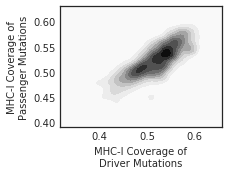

In [125]:
plt.figure(figsize=(3.25, 2.5))
sns.kdeplot(df[['classI', 'passenger_coverageI']].dropna().classI, 
            df[['classI', 'passenger_coverageI']].dropna().passenger_coverageI, cmap='Greys', shade=True)
#plt.xlim(0.08, 0.24)
#plt.ylim(0.1, 0.22)
plt.xlabel('MHC-I Coverage of\nDriver Mutations')
plt.ylabel('MHC-I Coverage of\nPassenger Mutations')
plt.locator_params(nbins=6)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/coverage.space_comparison.MHC-I.pdf')

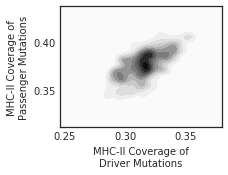

In [126]:
plt.figure(figsize=(3.25, 2.5))
sns.kdeplot(df[['classII', 'passenger_coverageII']].dropna().classII, 
            df[['classII', 'passenger_coverageII']].dropna().passenger_coverageII, cmap='Greys', shade=True)
#plt.xlim(0.04, 0.1)
#plt.ylim(0.05, 0.14)
plt.xlabel('MHC-II Coverage of\nDriver Mutations')
plt.ylabel('MHC-II Coverage of\nPassenger Mutations')
plt.locator_params(nbins=6)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/coverage.space_comparison.MHC-II.pdf')

In [53]:
df_mb = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.with_mutation_burden.csv',
                   index_col=0)

In [54]:
correlation = []
for tissue in df.Tissue.unique():
    try:
        df_tissue = df_mb[df_mb.Tissue == tissue].dropna()
        #sns.jointplot(df_tissue.classI, df_tissue.mutation_burden, stat_func=sp.spearmanr)
        #plt.show()
        #plt.clf()
        correlation.append(sp.spearmanr(df_tissue.classI, df_tissue.mutation_burden)[0])
    except:
        print tissue

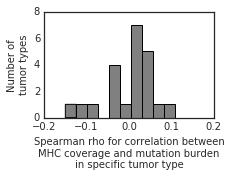

In [55]:
plt.figure(figsize=(3.25, 2.5))
ax = pd.Series(correlation).dropna().hist(color='grey')
ax.grid(False)
plt.xlim(-0.2, 0.2)
plt.xlabel('Spearman rho for correlation between\nMHC coverage and mutation burden\nin specific tumor type')
plt.ylabel('Number of\ntumor types')
plt.locator_params(nbins=5)
plt.tight_layout()
plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/mhc_diversity/coverage_mutation_correlation.pdf')